In [1]:
#importing different modules
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
#importing the dataset
dataset = pd.read_csv("Downloads/CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
#naming the different collumns in the dataset
dataset.columns = ['Name', 'Year', 'SellingPrice', 'KMdriven', 'Fuel', 'SellerType', 'Transmission', 'Owner']

In [4]:
#showing the top 3 in dataset
dataset.head(3)

Name  Year  SellingPrice  KMdriven    Fuel  SellerType  \
0             Maruti 800 AC  2007         60000     70000  Petrol  Individual   
1  Maruti Wagon R LXI Minor  2007        135000     50000  Petrol  Individual   
2      Hyundai Verna 1.6 SX  2012        600000    100000  Diesel  Individual   

  Transmission        Owner  
0       Manual  First Owner  
1       Manual  First Owner  
2       Manual  First Owner

In [5]:
#removing a 0 off every KMdriven entry as part of cleaning
dataset.KMdriven = dataset.KMdriven.floordiv(10)

In [6]:
dataset.head(3)

Name  Year  SellingPrice  KMdriven    Fuel  SellerType  \
0             Maruti 800 AC  2007         60000      7000  Petrol  Individual   
1  Maruti Wagon R LXI Minor  2007        135000      5000  Petrol  Individual   
2      Hyundai Verna 1.6 SX  2012        600000     10000  Diesel  Individual   

  Transmission        Owner  
0       Manual  First Owner  
1       Manual  First Owner  
2       Manual  First Owner

In [7]:
#showing the last 3 in dataset
dataset.tail(3)

Name  Year  SellingPrice  KMdriven    Fuel  \
4337               Maruti 800 AC BSIII  2009        110000      8300  Petrol   
4338  Hyundai Creta 1.6 CRDi SX Option  2016        865000      9000  Diesel   
4339                  Renault KWID RXT  2016        225000      4000  Petrol   

      SellerType Transmission         Owner  
4337  Individual       Manual  Second Owner  
4338  Individual       Manual   First Owner  
4339  Individual       Manual   First Owner

In [8]:
#removing different collumns from dataset which are not used in dataset
dataset.drop('Fuel', axis = 1, inplace = True)
dataset.drop('SellerType', axis = 1, inplace = True)
dataset.drop('Transmission', axis = 1, inplace = True)
dataset.drop('Owner', axis = 1, inplace = True)

In [9]:
dataset.head(3)

Name  Year  SellingPrice  KMdriven
0             Maruti 800 AC  2007         60000      7000
1  Maruti Wagon R LXI Minor  2007        135000      5000
2      Hyundai Verna 1.6 SX  2012        600000     10000

In [10]:
#showing the dataset descriptions
dataset.describe()

Year  SellingPrice      KMdriven
count  4340.000000  4.340000e+03   4340.000000
mean   2013.090783  5.041273e+05   6621.519816
std       4.215344  5.785487e+05   4664.424557
min    1992.000000  2.000000e+04      0.000000
25%    2011.000000  2.087498e+05   3500.000000
50%    2014.000000  3.500000e+05   6000.000000
75%    2016.000000  6.000000e+05   9000.000000
max    2020.000000  8.900000e+06  80659.000000

In [11]:
#importing module
from sklearn.linear_model import LinearRegression

In [12]:
#importing algorithms
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

In [13]:
#defining each algoithm 
ModelLR = LinearRegression()
ModelNN = MLPRegressor()
ModelRF = RandomForestRegressor()

In [14]:
#split between input (x) and output (y)
X = dataset.iloc[:,3:4]
y = dataset.iloc[:,2:3]

In [15]:
#split dataset into training and testing
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dataset.SellingPrice.values.reshape(-1, 1), dataset.KMdriven.values, 
     random_state=11)

In [16]:
#showing training set
Xtrain.shape

(3255, 1)

In [17]:
#showing testing set
Xtest.shape

(1085, 1)

In [18]:
#printing X training
print(Xtrain)

[[1000000]
 [ 350000]
 [ 900000]
 ...
 [ 240000]
 [ 600000]
 [ 630000]]


In [19]:
#printing Y training 
print(Ytrain)

[ 1000 11000  6000 ...  5000   500  4000]


In [20]:
#deploying linear regression model
ModelLR.fit(X=Xtrain, y=Ytrain)

LinearRegression()

In [21]:
ModelLR.coef_

array([-0.0016069])

In [22]:
ModelLR.intercept_

7395.490374460364

In [23]:
#defining predicted value
predicted = ModelLR.predict(Xtest)

In [24]:
#defining expected
expected = Ytest

In [25]:
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 6913.42, expected: 4000.00
predicted: 6752.73, expected: 5921.00
predicted: 7114.28, expected: 2000.00
predicted: 6600.08, expected: 6000.00
predicted: 6760.77, expected: 7000.00
predicted: 6993.77, expected: 12000.00
predicted: 5957.32, expected: 1300.00
predicted: 5370.80, expected: 3922.00
predicted: 7202.66, expected: 12000.00
predicted: 6511.70, expected: 7500.00
predicted: 7283.01, expected: 5000.00
predicted: 7291.04, expected: 14000.00
predicted: 6029.63, expected: 4450.00
predicted: 6833.08, expected: 2000.00
predicted: 7082.14, expected: 5700.00
predicted: 1289.27, expected: 1000.00
predicted: 6873.25, expected: 7101.00
predicted: 7009.83, expected: 11000.00
predicted: 6993.77, expected: 11000.00
predicted: 6897.35, expected: 9585.00
predicted: 7266.94, expected: 7000.00
predicted: 7291.04, expected: 15000.00
predicted: 6792.90, expected: 7000.00
predicted: 6559.90, expected: 12000.00
predicted: 7154.46, expected: 5300.00
predicted: 6768.80, expected: 9000.00
predi

In [26]:
predict = (lambda x: ModelLR.coef_ * x + 
                      ModelLR.intercept_)

In [27]:
#predicting the selling price from 2000KMdriven and shwoing the model works 
predict(2000)

array([7392.27657563])

In [28]:
#importing module
import seaborn as sns

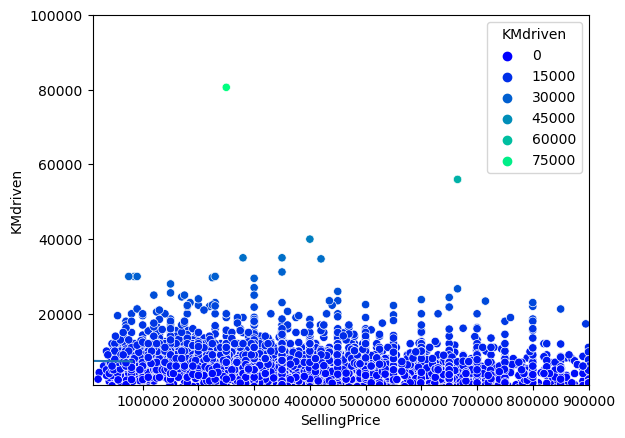

In [45]:
#plotting data onto graph and showing the linear regression line
axes = sns.scatterplot(data=dataset, x='SellingPrice', y='KMdriven',
     hue='KMdriven', palette='winter', legend=True)

axes.set_ylim(1000, 100000)
axes.set_xlim(10000, 900000)

import numpy as np

x = np.array([min(dataset.KMdriven.values), max(dataset.KMdriven.values)])

y = predict(x)

import matplotlib.pyplot as plt 

line = plt.plot(x, y)



In [29]:
#importing module
import pickle

In [35]:
#saving model as pkl file
with open('model_pickle', 'wb') as f:
    pickle.dump(ModelLR,f)

In [36]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [39]:
#testing out model again
predict(7000)

array([7384.24207856])

In [43]:
#saving the cleaned dataset as csv file
dataset.to_csv('cleaned_dataset', index=False)

Summary of Project:

For this project we were asked to find a dataset, clean it out and make it ready for testing and training, once this was done be able to have the model come out with an accurate prediction of a hypothesis which is self chosen. For my project I chose a dataset which contains car information such as the name of the car, the selling price of the car, the kilometers driven on that car, the petrol the car uses and a few other collumns which were not used in my model. My hypothesis was whether or not the kilometers driven on a car affects its selling price or not and whether there was a direct coralation between these two values. I first started off with cleaning the data and removing collumns which I did not need such as the petrol the car used, after this I was left with the name of the car, the kilometers driven on the car and its selling price.
After this I split the data into the input values and the output values and aslo spilitting the data into training and testing. I trained and tested the model using linear regression and once this was done the model was able to give me an accurate prediction based of the value I gave it. After this is showed the data as a graph to display the linear regression line and support my hypothesis, all that was left was to export the model into a pickle container to be used in a web application.

This brings me onto the final part of the project which was deploying the model onto a web application and this was done using flask in python. once the pickle file was imported into the application, it allowed the app to get data which is inputted and send it to the model to come back with a prediction. After several days of trying to get this to work I was unable to get the flask application to display a prection but you can see my working in the code and how I attempted to get this done. If I was to attempt this project in the future I would allocate more time for the deployment of the model as its something I struggled with a lot but overall I am happy to say I was able to load a dataset, clean it out and the train and test it using a machine learning algorithm to give me back a prediction on the data which is inputted.